# MNIST Data - Sequential API
- This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.
- https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import itertools 
import numpy as np
import pandas as pd

In [5]:
# Check TensorFlow version
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.13.0


## Data

In [6]:
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train.astype(np.float32) / 255.0, X_test.astype(np.float32)/ 255.0

11490434/11490434 [==============================] - 6s 1us/step


In [7]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [8]:
# The y data is already shuffled so we do not need to do it again.
print(y_train[0:100])

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6
 3 0 2 1 1 7 9 0 2 6 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1]


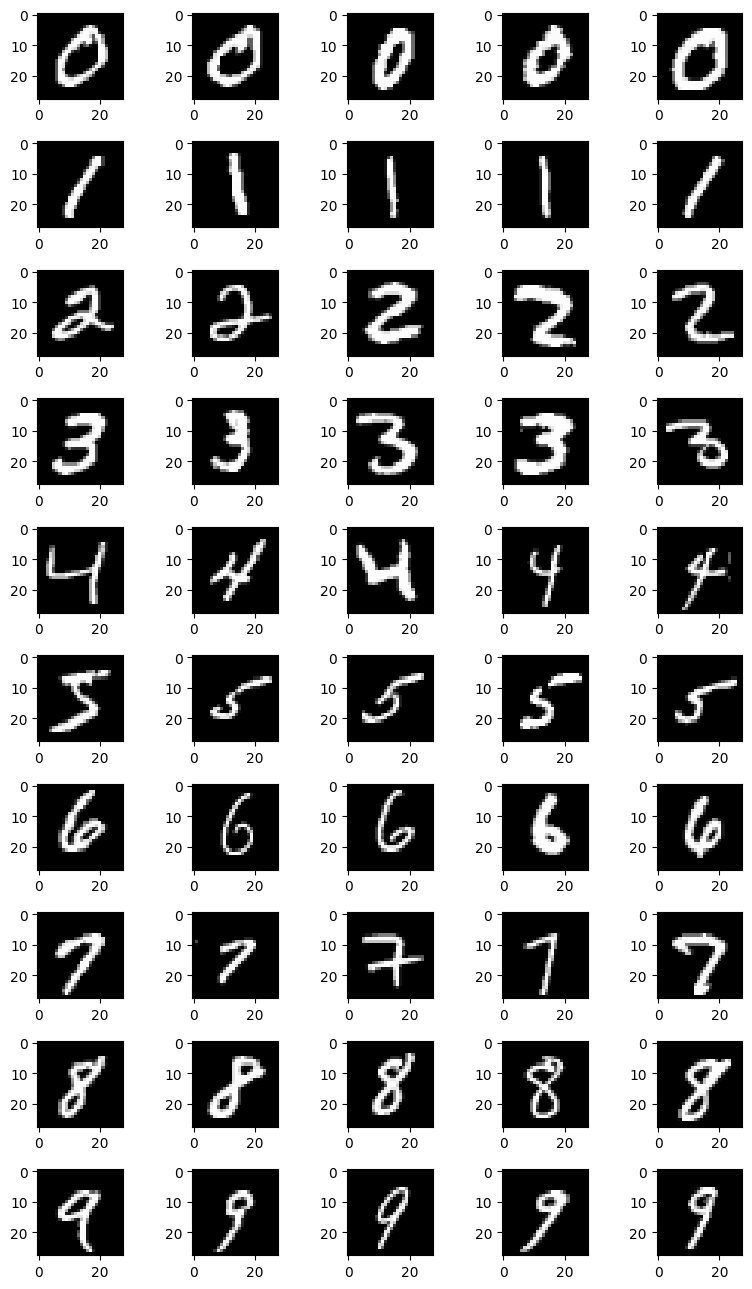

In [9]:
fig, axes = plt.subplots(10,5, figsize=(8,13))
for num in range(10):
    x_plot = X_train[y_train==num]
    for idx in range(np.array(axes).shape[1]):
        axes[num][idx].imshow(x_plot[idx], cmap='gray')
fig.tight_layout()
plt.show()

## Model building
- Build the `tf.keras.Sequential` model by stacking layers. Choose an optimizer and loss function for training:

In [10]:
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape=(28,28)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu', name='hidden1'),
  tf.keras.layers.Dense(10, activation='softmax', name='output')
])

2024-03-01 15:10:51.752562: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-03-01 15:10:51.752790: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-03-01 15:10:51.752800: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-03-01 15:10:51.752874: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-01 15:10:51.753183: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


## Compile model
- Prepare for fitting

In [11]:
# If choosing 'adam' as string, the default learning rate is 0.001.

model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden1 (Dense)             (None, 128)               100480    
                                                                 
 output (Dense)              (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Training (Fitting)

In [13]:
tf_fit = model.fit(X_train, y_train, validation_split=0.1, epochs=20, verbose=1)

Epoch 1/20


2024-03-01 15:10:52.374271: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1688/1688 [==============================] - ETA: 0s - loss: 0.3782 - accuracy: 0.8916

2024-03-01 15:11:01.092498: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1688/1688 [==============================] - 9s 5ms/step - loss: 0.3782 - accuracy: 0.8916 - val_loss: 0.2510 - val_accuracy: 0.9293
Epoch 2/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3163 - accuracy: 0.9110 - val_loss: 0.2632 - val_accuracy: 0.9260
Epoch 3/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3211 - accuracy: 0.9115 - val_loss: 0.2644 - val_accuracy: 0.9290
Epoch 4/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3254 - accuracy: 0.9116 - val_loss: 0.2803 - val_accuracy: 0.9260
Epoch 5/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3338 - accuracy: 0.9098 - val_loss: 0.2774 - val_accuracy: 0.9282
Epoch 6/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3474 - accuracy: 0.9072 - val_loss: 0.2976 - val_accuracy: 0.9247
Epoch 7/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3577 - accuracy: 0.9068 - val_loss: 0.3331 - val_accuracy: 0.9210
Epo

In [14]:
# Inspect the training history
df = pd.DataFrame(tf_fit.history)
df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.378234,0.891593,0.250996,0.929333
1,0.316318,0.911000,0.263185,0.926000
2,0.321144,0.911537,0.264372,0.929000
3,0.325355,0.911611,0.280303,0.926000
4,0.333758,0.909833,0.277398,0.928167


<Axes: title={'center': 'Loss'}, xlabel='Epoch', ylabel='Loss'>

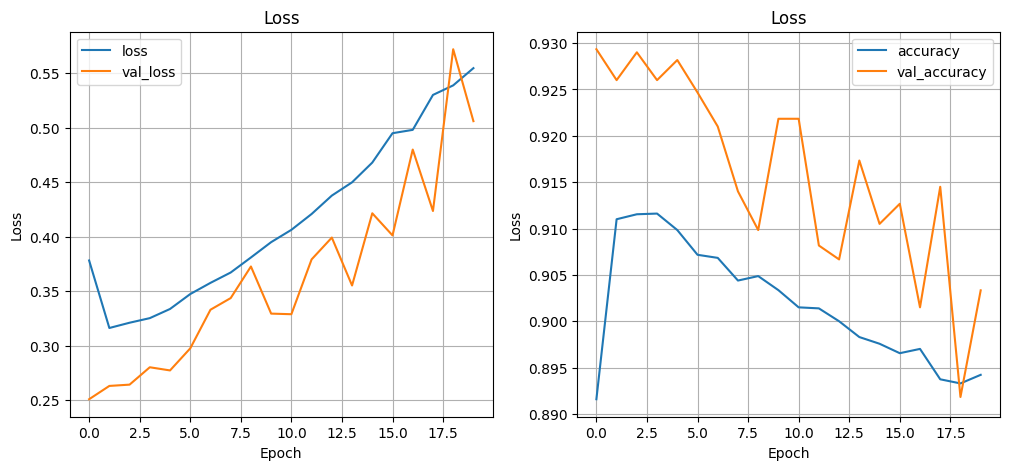

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

df[["loss", "val_loss"]].plot(
    ax=axes[0], title="Loss", grid=True, legend=True, xlabel="Epoch", ylabel="Loss"
)

df[["accuracy", "val_accuracy"]].plot(
    ax=axes[1], title="Loss", grid=True, legend=True, xlabel="Epoch", ylabel="Loss"
)

## Evaluation
- The `Model.evaluate` method checks the models performance.

In [16]:
model.evaluate(X_test,  y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.6188 - accuracy: 0.8876


[0.618773341178894, 0.8876000046730042]

In [17]:
y_hat = model(X_test)
print(y_hat.shape)
print(y_hat.numpy()[:2])

(10000, 10)
[[9.7019693e-22 7.2241593e-20 8.8059925e-02 9.1193676e-01 6.9392999e-13
  2.4581086e-08 4.6886413e-18 3.3470599e-06 1.9823634e-14 3.2853207e-18]
 [0.0000000e+00 4.5953734e-17 3.4453048e-12 1.0000000e+00 4.6382108e-22
  2.8728531e-37 0.0000000e+00 4.9745966e-28 4.8049770e-23 3.7706850e-27]]


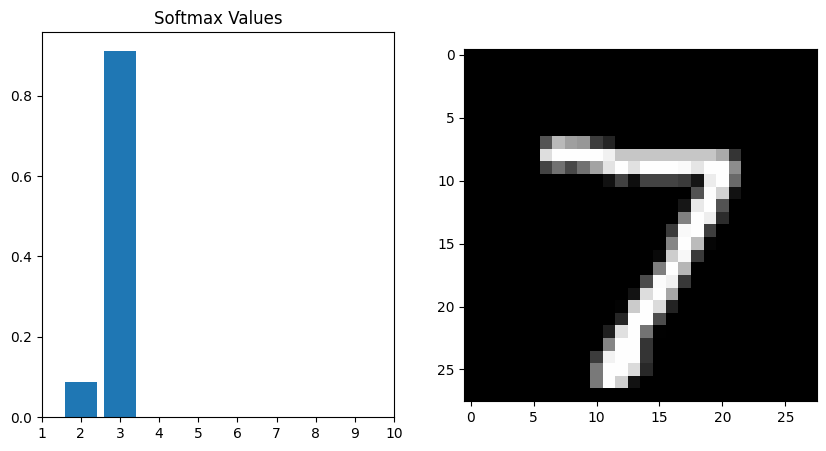

In [18]:
x_ticklabel = [i + 1 for i in range(10)]
fig, axes = plt.subplots(1,2, figsize=(10,5))
yp = y_hat.numpy()[0]
xp = list(range(yp.shape[0]))
axes[0].bar(xp, yp)
axes[0].set_title('Softmax Values')
axes[0].set_xticks(x_ticklabel)
axes[0].set_xticklabels(x_ticklabel)
axes[0].set_xlim([1,10])
axes[1].imshow(X_test[0], cmap='gray')
plt.show()

In [19]:
# Find misclassification
y_pred_tf = model(X_test)
y_pred_tf.numpy().shape

y_pred = tf.math.argmax(y_pred_tf,axis=1).numpy()
print(y_pred.shape)
print(y_test.shape)

loc = y_pred != y_test
print(f'Missclassification = {loc.sum()}')

(10000,)
(10000,)
Missclassification = 4831


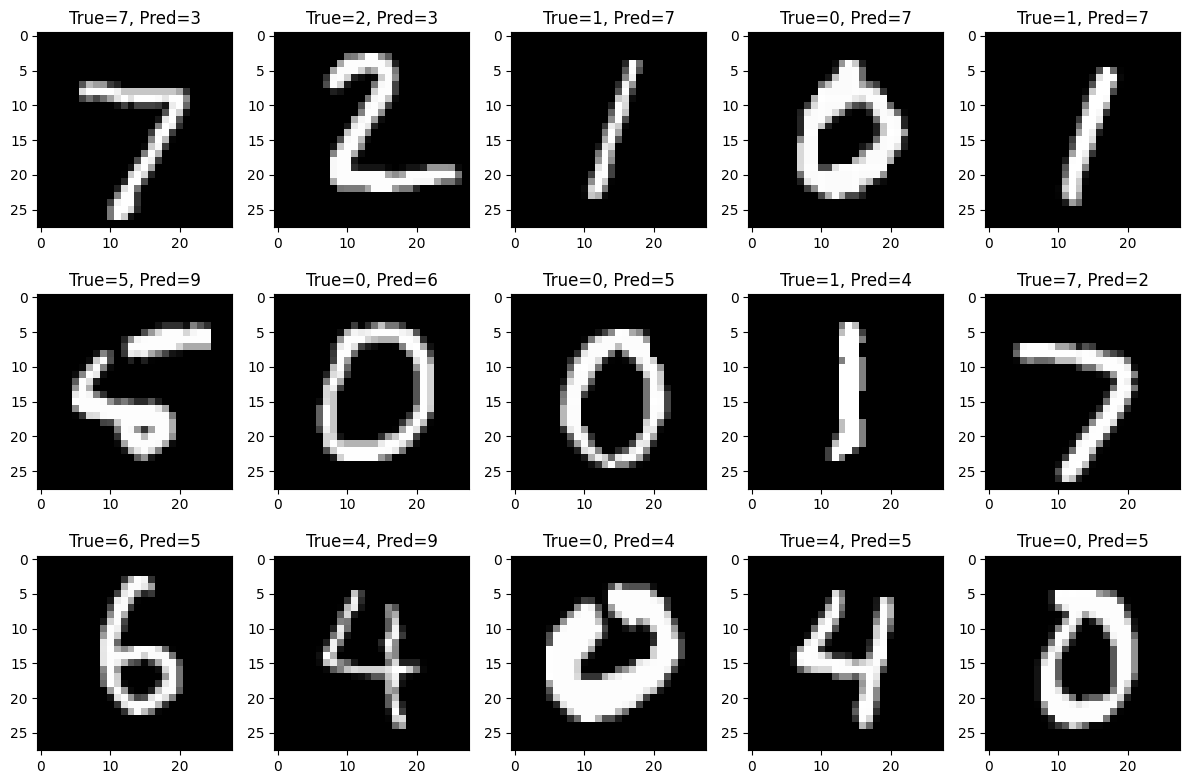

In [20]:
fig, axes2D = plt.subplots(3,5, figsize=(12,8))
axes = list(itertools.chain.from_iterable(axes2D)) # Flatten 2D list
X_test_miss = X_test[loc]
y_test_miss = y_test[loc]
y_pred_miss = y_pred[loc]
for idx, ax in enumerate(axes):
    ax.imshow(X_test_miss[idx], cmap='gray')
    ax.set_title(f'True={y_test_miss[idx]}, Pred={y_pred_miss[idx]}')
fig.tight_layout()
plt.show()